In [1]:
 import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re

In [2]:
df=pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,job_state,Hourly,employer provided,company_name_text,company_age,same_state,python_jobs,ai_jobs
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM,0,0,"['Tecolote Research', '3.8']",48,0,1,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD,0,0,"['University of Maryland Medical System', '3.4']",37,0,1,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,FL,0,0,"['KnowBe4', '4.8']",11,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,WA,0,0,"['PNNL', '3.8']",56,1,1,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,NY,0,0,"['Affinity Solutions', '2.9']",23,1,1,0


In [3]:
#print the mean of a the min sal and keep that into a varialble :
df['min_salary'].mean()

#antoher way to fina the mi salary ::
df.min_salary.mean()


74.06873315363882

In [ ]:
for i in df['Job Title']:
  print(i)

In [ ]:
##count data scientist jobs ::
DataScience=0
for i in df['Job Title']:
  if 'data scientist' in i.lower():
    DataScience=DataScience+1
print("Total DS title :", DataScience)

In [ ]:
##count data Analyst jobs ::
analyst=0
for i in df['Job Title']:
  if 'data analyst' in i.lower():
    analyst=analyst+1
print("Total Analyst title :", analyst)

In [ ]:
##count data Engeneer jobs ::
DE=0
for i in df['Job Title']:
  if 'data engineer' in i.lower():
    DE=DE+1
print("Total Data Engeneer title :", DE)


In [ ]:
#count machine learning : ML

ml=0
for i in df['Job Title']:
  if 'machine learning' in i.lower():
    ml=ml+1
print("Total ML title :", ml)

In [ ]:
#count total manager ::
manager=0
for i in df['Job Title']:
  if 'manager' in i.lower():
    manager=manager+1
print("Total Managers title :", manager)

In [ ]:
#total director ::

director=0
for i in df['Job Title']:
  if 'director' in i.lower():
    director=director+1
print("Total ML title :", director)

In [6]:
#calculation annual max salary ::
df['annual_max_sal']=df.apply(lambda x: x.max_salary*2 if x.Hourly==1 else x.max_salary, axis=1)


In [ ]:
#check the values ::::::::::::
df[df.Hourly ==1][['Hourly','min_salary','max_salary','annual_min_sal','annual_max_sal']]


In [8]:

df['company_name_text']=df.company_name_text.apply(lambda x : x.replace('[', ''))


In [9]:
df['company_name_text']=df.company_name_text.apply(lambda x : x.replace(']', ''))

In [10]:
df['company_name_text']=df.company_name_text.apply(lambda x : x.replace(',', ''))

In [11]:
df['company_name_text']=df.company_name_text.apply(lambda x : x.replace("'", ""))

In [12]:
#Removing "" from company name text 
df['company_name_text']=df.company_name_text.apply(lambda x : x.replace('"', ""))

In [13]:
##count the number of compitators :::

df['compititors_count']=df['Competitors'].apply(lambda x : len(x.split(',')) if x !='-1' else 0)

In [ ]:
df[['Company Name','compititors_count']]

In [15]:
#creating another column job_title_simple
#so we could count the values later and plot a graph 

#function to create the column :

def simplified_job_title(title):
  if 'data scientist' in title.lower():
    return 'data scientist'
  elif 'data engineer' in title.lower():
    return 'data engineer'
  elif 'data engineer' in title.lower():
    return 'data engineer'
  elif 'analyst' in title.lower():
    return 'analyst'
  elif 'director' in title.lower():
    return 'director'
  elif 'manager' in title.lower():
    return 'manager'
  elif 'machine learning' in title.lower():
    return 'machine learning'
  else:
    return 'other'
  

In [16]:
df['job_title_simple']=df['Job Title'].apply(simplified_job_title)


In [17]:
df['job_title_simple'].value_counts()

data scientist      279
other               184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_title_simple, dtype: int64

Here is some graphs and charts to show the data that I have been working on 

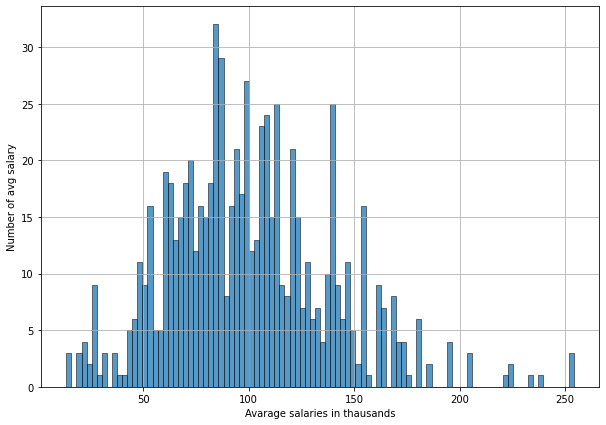

In [91]:
# Distribution of avg salary 
plt.figure(figsize=(10,7))
sns.histplot(df['avg_salary'], bins=100)
plt.ylabel("Number of avg salary")
plt.xlabel("Avarage salaries in thausands")
plt.grid()
plt.show()

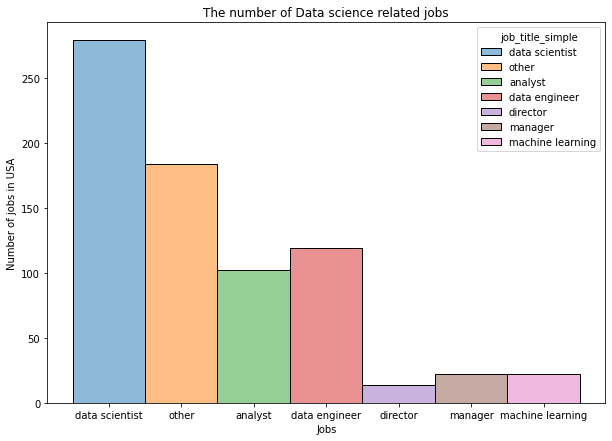

In [92]:
#Simple histogram : 

plt.figure(figsize=(10,7))
histplot= sns.histplot(data=df, x=df['job_title_simple'], hue='job_title_simple')
histplot.set(xlabel='Jobs', ylabel='Number of jobs in USA', title='The number of Data science related jobs')
plt.show()

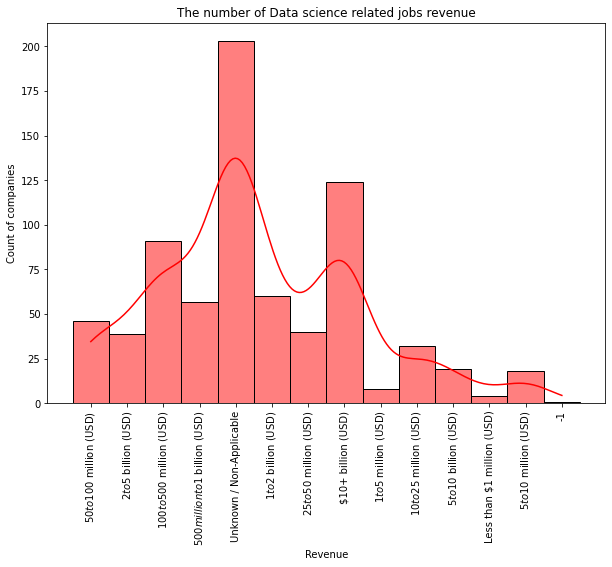

In [94]:
#2:

plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
hist2 = sns.histplot(df['Revenue'], color='r',kde=True)
hist2.set(xlabel='Revenue', ylabel='Count of companies', title='The number of Data science related jobs revenue')
plt.show()


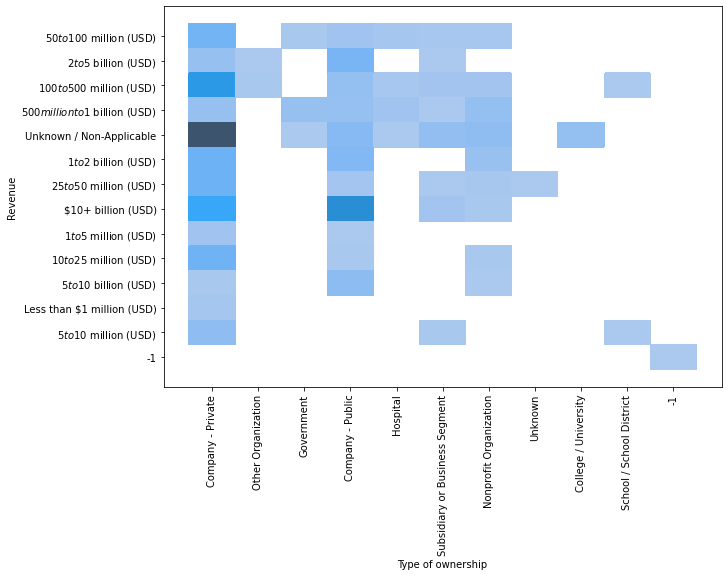

In [20]:
#3

plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
df.head(3)
line=sns.histplot(x='Type of ownership',y='Revenue',data=df)

#hist2.set(xlabel='Revenue', ylabel='Count of companies', title='The number of Data science related jobs')


In [ ]:
df.head()

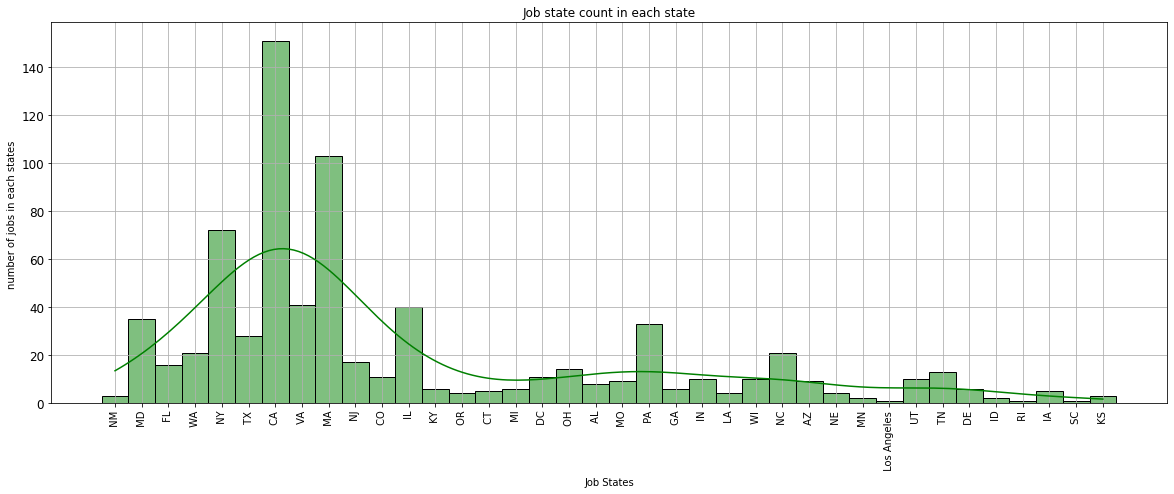

In [22]:
#4:Simple number of jobs offered in each state -->
plt.figure(figsize=(20,7))
plt.xticks(rotation=90,size=10)
plt.yticks(size=12)

jobState=sns.histplot(df['job_state'],color='g',kde=True)
jobState.set(xlabel="Job States", ylabel="number of jobs in each states ", title='Job state count in each state')
plt.grid()
plt.show()



**A bar plot showing the job title and their respective avarage minimum annual salary **

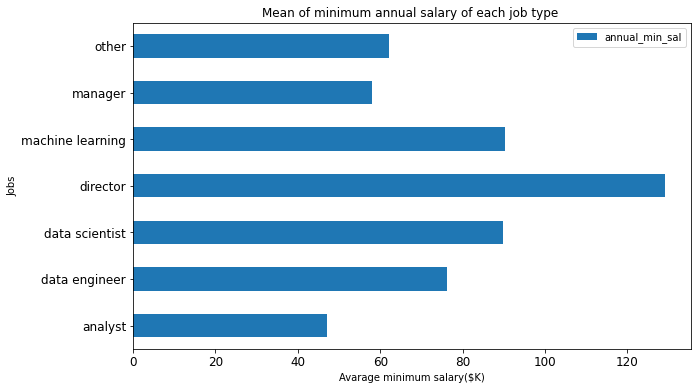

In [97]:
#5
#find the mean rating of data science jobs 
min_sal_group=df[['annual_min_sal','job_title_simple']]

#the mean of minimum annual salary of each job types ::-->
min_sal_group=min_sal_group.groupby(min_sal_group['job_title_simple']).mean()


#ploting the bar chart using pandas :-->
ax=min_sal_group.plot(kind='barh', figsize=(10,6),fontsize=12)
ax.set(xlabel='Avarage minimum salary($K)',ylabel='Jobs',title='Mean of minimum annual salary of each job type ')
plt.show()

**Sector and size : -->**

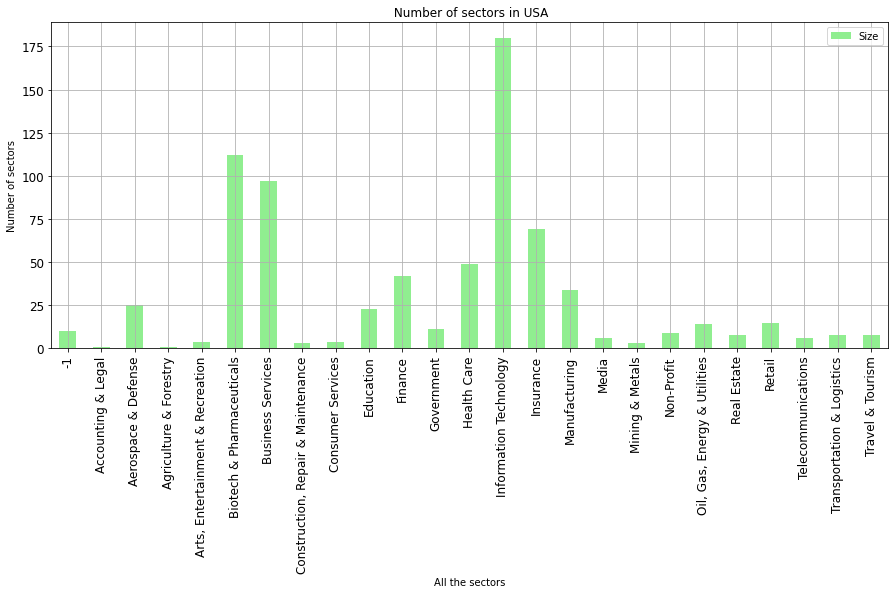

In [24]:
sector_size=df[['Sector','Size']]
sector_size=sector_size.groupby(sector_size['Sector']).count()

ax=sector_size.plot(kind='bar', figsize=(15,6),fontsize=12,color='lightgreen',)
ax.set(xlabel='All the sectors',ylabel='Number of sectors',title=' Number of sectors in USA')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


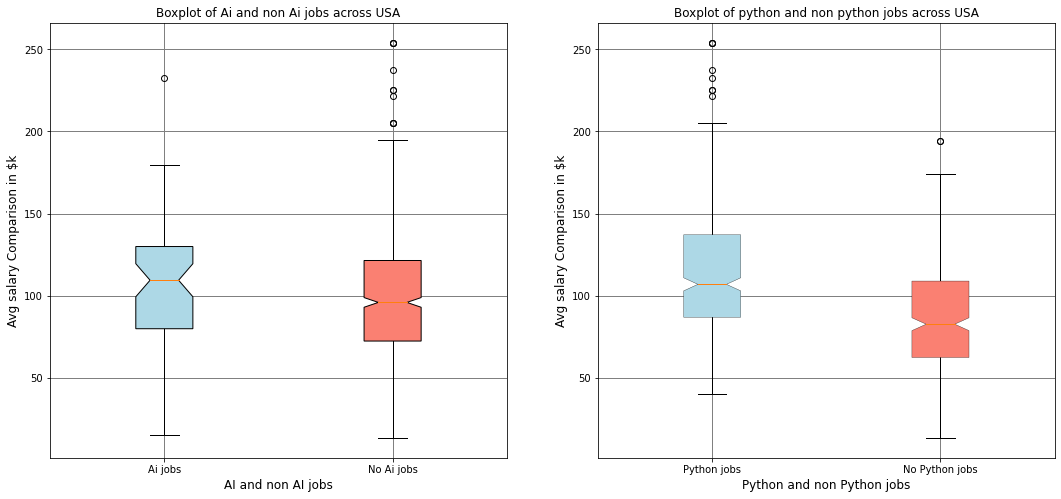

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)

#python jobs and ai jobs avg salary :
colors = [ 'lightblue', 'salmon']

ai_jobs=df[['avg_salary','ai_jobs']].query('ai_jobs =="1"')
no_ai_job=df[['avg_salary','ai_jobs']].query('ai_jobs =="0"')

ai_jobs_avg_sal=ai_jobs['avg_salary']
no_ai_job_avg_sal=no_ai_job['avg_salary']

y_list=np.array([ai_jobs_avg_sal,no_ai_job_avg_sal])

box = plt.boxplot(y_list,labels=['Ai jobs', 'No Ai jobs'],patch_artist=True,notch=True,widths = 0.25)
plt.ylabel("Avg salary Comparison in $k", size=12)
plt.xlabel("AI and non AI jobs",size=12)
plt.title("Boxplot of Ai and non Ai jobs across USA")
plt.grid(color='grey', linewidth=1)
#colring : 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
  

#Python jobs and no pyton jobs 
plt.subplot(1,2,2)
py_job=df[['avg_salary', 'python_jobs']].query('python_jobs==1')
no_py_job=df[['avg_salary', 'python_jobs']].query('python_jobs==0')

py_job_avgsal=py_job['avg_salary']
no_py_job_avgsal=no_py_job['avg_salary']

y_axis_list=np.array([py_job_avgsal,no_py_job_avgsal])

box1=plt.boxplot(y_axis_list, labels=['Python jobs', 'No Python jobs'],patch_artist=True,notch=True,widths = 0.25)
plt.ylabel("Avg salary Comparison in $k", size=12)
plt.xlabel("Python and non Python jobs",size=12)
plt.title("Boxplot of python and non python jobs across USA")


for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(0.3)
    

plt.grid(color='grey',linewidth=1)
plt.show()



**All the company that offer AI related jobs and their revenue**

In [26]:
company_name_ai =df[['company_name_text','ai_jobs','Revenue']]

company_name_ai_values=company_name_ai.query('ai_jobs == 1')

company_name_ai_values




,company_name_text,ai_jobs,Revenue
0,Tecolote Research 3.8,1,$50 to $100 million (USD)
14,Takeda Pharmaceuticals 3.7,1,$10+ billion (USD)
19,Pinnacol Assurance 4.0,1,$500 million to $1 billion (USD)
56,Netskope 4.1,1,Unknown / Non-Applicable
63,Pacific Northwest National Laboratory 3.8,1,$500 million to $1 billion (USD)
...,...,...,...
680,Software Engineering Institute 2.6,1,Unknown / Non-Applicable
689,SoftBank Robotics 3.8,1,$25 to $50 million (USD)
692,MITRE 3.2,1,$1 to $2 billion (USD)
693,SkySync 5.0,1,Unknown / Non-Applicable


**Violine plot Of different job initials (types)**

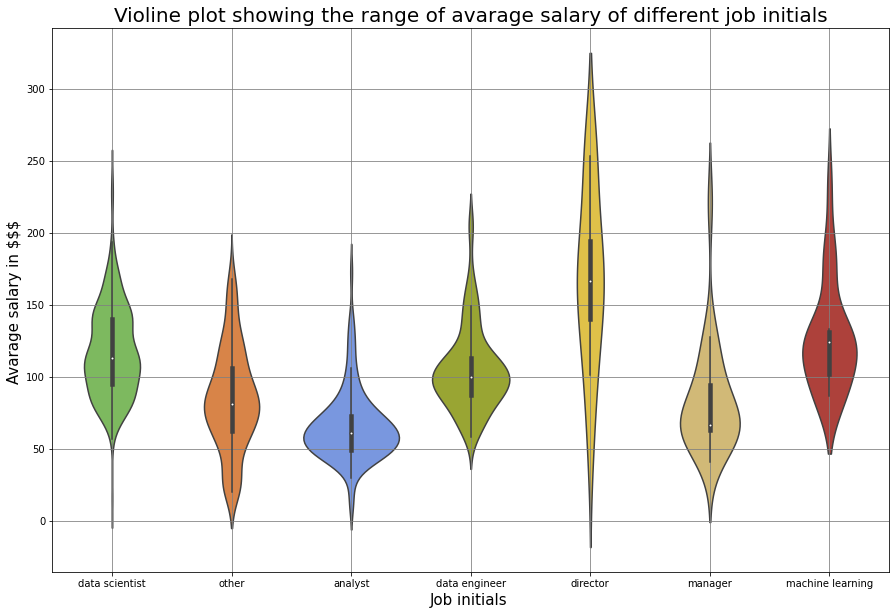

In [27]:
plt.figure(figsize=(15,10))

colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
sns.violinplot(x='job_title_simple', y='avg_salary', data=df, palette=colors_list)
plt.xlabel("Job initials ",size = 15)
plt.ylabel("Avarage salary in $$$ ", size = 15)
plt.title("Violine plot showing the range of avarage salary of different job initials", size=20)
plt.grid(color='grey')
plt.show()

In [29]:
#
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,job_state,Hourly,employer provided,company_name_text,company_age,same_state,python_jobs,ai_jobs,annual_min_sal,annual_max_sal,compititors_count,job_title_simple
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM,0,0,Tecolote Research 3.8,48,0,1,1,53,91,0,data scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD,0,0,University of Maryland Medical System 3.4,37,0,1,0,63,112,0,data scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,FL,0,0,KnowBe4 4.8,11,1,1,0,80,90,0,data scientist


**Types of ownership and their ratings**

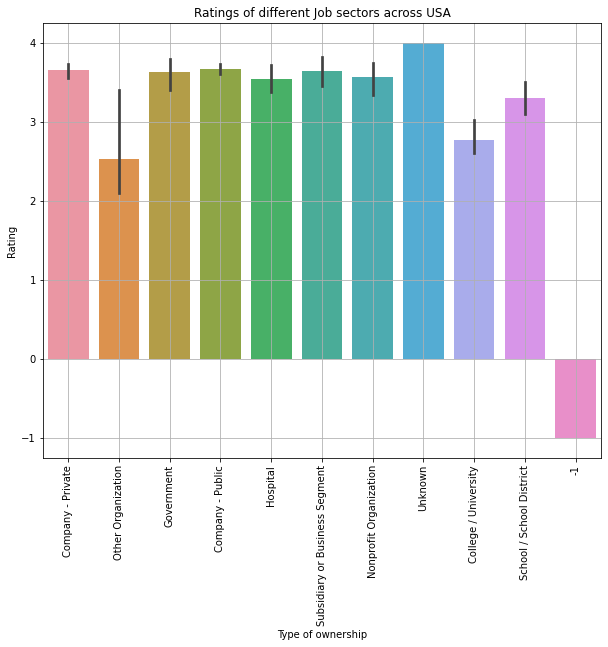

In [55]:
plt.figure(figsize=(10,8))
g=sns.barplot(x="Type of ownership", y="Rating", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.grid()
plt.title("Ratings of different Job sectors across USA")
plt.show()

**Pivot table visualization**

Industry and avg salary

In [ ]:
pivot_table =pd.pivot_table(df, index = 'Industry', values = 'avg_salary')
pivot_table.plot(kind='bar', figsize=(20,10),fontsize=12,color='g')
plt.ylabel("Avg salary")
plt.title("Visualized pivot table for Different industry and their avarage salary")
plt.grid()
plt.show()

sector and avg salary

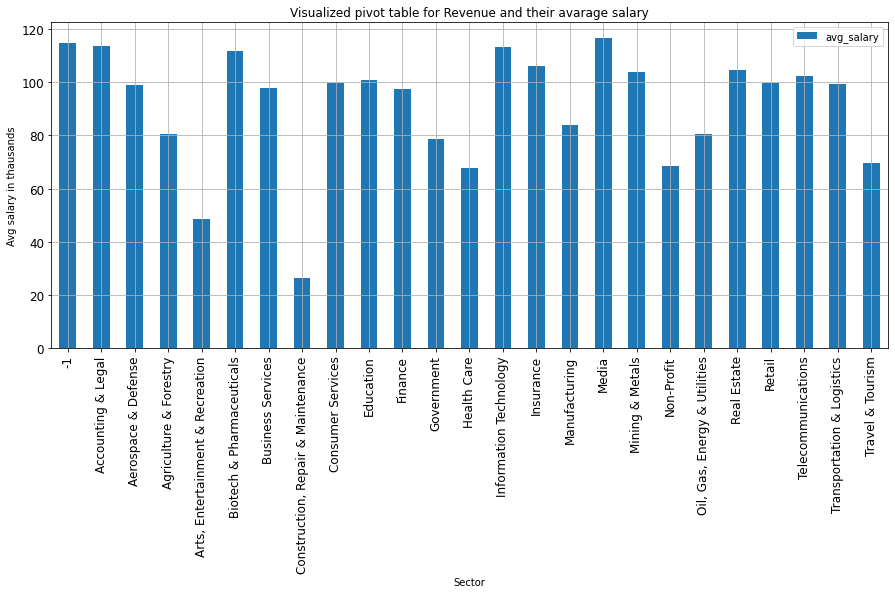

In [80]:
pivot_table_revenue_avg_sal =pd.pivot_table(df, index = 'Sector', values = 'avg_salary')
pivot_table_revenue_avg_sal.plot(kind='bar', figsize=(15,6),fontsize=12)
plt.ylabel("Avg salary in thausands")
plt.title("Visualized pivot table for Sector and their avarage salary")
plt.grid()
plt.show()

Sector and age

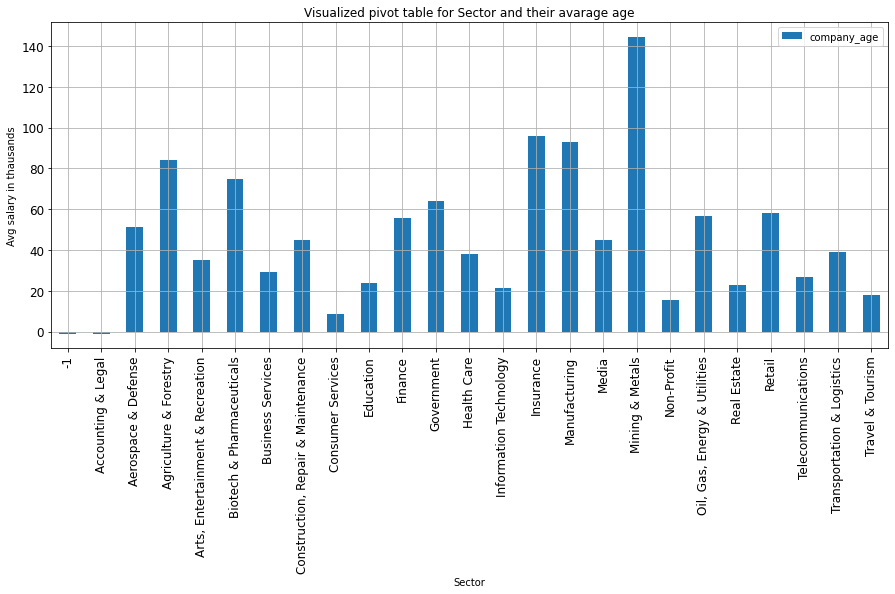

In [98]:
pivot_table_sector_revenue =pd.pivot_table(df, index = 'Sector', values = 'company_age')
pivot_table_sector_revenue .plot(kind='bar', figsize=(15,6),fontsize=12)
plt.ylabel("Avg salary in thausands")
plt.title("Visualized pivot table for Sector and their avarage age")
plt.grid()
plt.show()